In [ ]:
#single layer percept

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Display shapes of the data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(f"{x_train.shape[0]} train samples, {x_test.shape[0]} test samples")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
60000 train samples, 10000 test samples


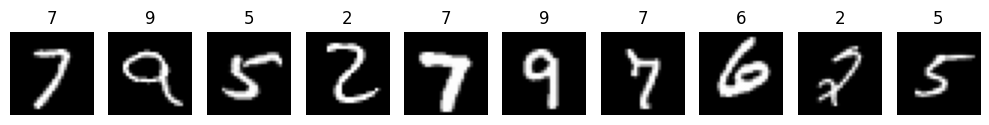

In [ ]:
# Display 10 random samples from training set
plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Normalize the data to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
# Flatten the images (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], -1))  # (60000, 784)
x_test = x_test.reshape((x_test.shape[0], -1))     # (10000, 784)

In [ ]:
# Confirm label classes
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)
print("Number of classes:", len(unique_classes))

Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


In [ ]:
# Build the model
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10-class output
])

In [ ]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse version since labels are integers
    metrics=["accuracy"]
)

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
422/422 - 5s - 12ms/step - accuracy: 0.9010 - loss: 0.3528 - val_accuracy: 0.9625 - val_loss: 0.1417
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9566 - loss: 0.1463 - val_accuracy: 0.9697 - val_loss: 0.1067
Epoch 3/10
422/422 - 1s - 2ms/step - accuracy: 0.9698 - loss: 0.1042 - val_accuracy: 0.9707 - val_loss: 0.1059
Epoch 4/10
422/422 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0778 - val_accuracy: 0.9758 - val_loss: 0.0815
Epoch 5/10
422/422 - 1s - 2ms/step - accuracy: 0.9819 - loss: 0.0600 - val_accuracy: 0.9737 - val_loss: 0.0898
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.9844 - loss: 0.0492 - val_accuracy: 0.9765 - val_loss: 0.0816
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9797 - val_loss: 0.0772
Epoch 8/10
422/422 - 1s - 2ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9770 - val_loss: 0.0844
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9918 - loss: 0.0272 - val_accuracy: 0.9767 - val_loss: 0.0829


In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")


Test accuracy: 0.9771


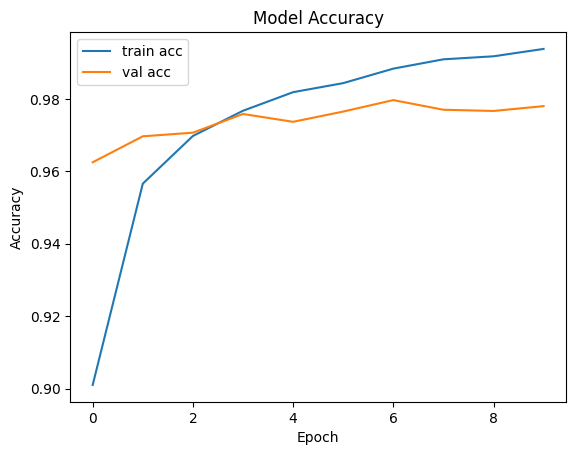

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

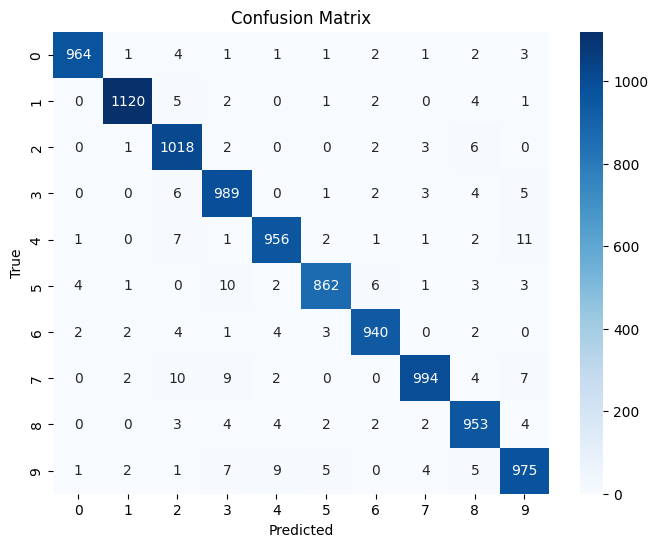

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Find misclassified indices
misclassified_indices = np.where(y_pred != y_test)[0]
print(f"\nTotal misclassified samples: {len(misclassified_indices)}")


Total misclassified samples: 229


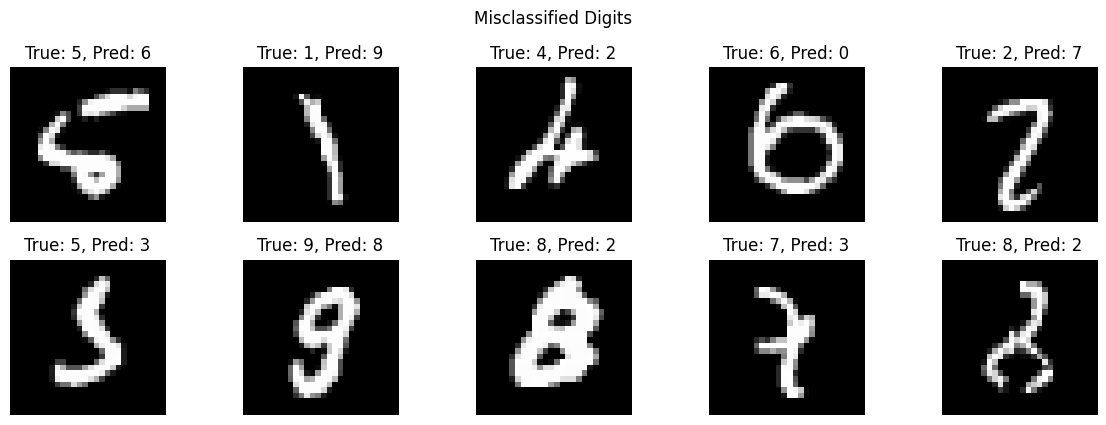

In [ ]:
# Show 10 misclassified images
plt.figure(figsize=(12, 4))
for i, idx in enumerate(misclassified_indices[:10]):
    img = x_test[idx].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Misclassified Digits", y=1.05)
plt.show()